O objetivo deste projeto é realizar uma análise exploratória da Tabela CMED.

In [ ]:
#Importando as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as mt
import numpy as np


In [ ]:
#Abrindo o arquivo que será analisado
#Retirando as linhas que não são necessárias para nossa análise
#
df = pd.read_excel('/content/drive/MyDrive/CMED.xls')
df = df.iloc[59:]
df.columns = df.iloc[0]
df = df[1:]

In [ ]:
#Utilizando o método .head() para verificar se deu certo
df.head()

59,PRINCÍPIO ATIVO,CNPJ,LABORATÓRIO,CÓDIGO GGREM,REGISTRO,EAN 1,EAN 2,EAN 3,PRODUTO,APRESENTAÇÃO,...,PMVG 21%,PMVG 22%,RESTRIÇÃO HOSPITALAR,CAP,CONFAZ 87,ICMS 0%,ANÁLISE RECURSAL,LISTA DE CONCESSÃO DE CRÉDITO TRIBUTÁRIO (PIS/COFINS),COMERCIALIZAÇÃO 2022,TARJA
60,BUTILBROMETO DE ESCOPOLAMINA,61.082.426/0002-07,COSMED INDUSTRIA DE COSMETICOS E MEDICAMENTOS ...,540921040046917,1781708900042,7896094921313,-,-,BUSCOPAN,20 MG SOL INJ CT 5 AMP VD TRANS X 1 ML,...,"25,57","25,94",Não,Não,Não,Não,(9),Negativa,Sim,Tarja Vermelha (**)
61,DIPIRONA MONOIDRATADA;BUTILBROMETO DE ESCOPOLA...,61.082.426/0002-07,COSMED INDUSTRIA DE COSMETICOS E MEDICAMENTOS ...,540922040053814,1781708910064,7896094921306,-,-,BUSCOPAN COMPOSTO,"(4,0 + 500,0) MG/ML SOL INJ IV/IM CT 3 AMP VD ...",...,"23,13","23,48",Não,Não,Não,Não,(9),Negativa,Sim,Tarja Preta (**)
62,CIPIONATO DE TESTOSTERONA,00.923.140/0001-31,EMS SIGMA PHARMA LTDA,531624901159411,1356906000025,7894916202671,-,-,DEPOSTERON,100 MG/ML SOL INJ CX 3 AMP VD AMB X 2 ML,...,"163,96","166,40",Não,Não,Não,Não,(8),Negativa,Sim,Tarja Vermelha sob restrição
63,CLORIDRATO DE ESCETAMINA,51.780.468/0001-87,JANSSEN-CILAG FARMACÊUTICA LTDA,514521030038805,1123634350014,7896212479931,-,-,SPRAVATO,"140 MG/ML SOL SPR NAS CT FR VD TRANS X 0,2 ML ...",...,"1800,96","1827,82",Sim,Não,Não,Não,(5),Negativa,Sim,Tarja Vermelha sob restrição
64,RITUXIMABE,61.286.647/0001-16,SANDOZ DO BRASIL INDÚSTRIA FARMACÊUTICA LTDA,511519060070807,1004706180011,7897595635204,-,-,RIXIMYO,10 MG/ML SOL DIL INFUS CT 2 FR VD TRANS X 10 ML,...,"3509,03","3554,02",Sim,Não,Não,Sim,(3),Positiva,Sim,Tarja Vermelha


In [ ]:
#1. Aqui utilizaremos o método .describe() para ter uma visão estatística geral do nosso data frame
df.describe()

,PRINCÍPIO ATIVO,CNPJ,LABORATÓRIO,REGISTRO,PRODUTO,APRESENTAÇÃO,CLASSE TERAPÊUTICA,TIPO DE PRODUTO (STATUS DO PRODUTO),REGIME DE PREÇO,PF Sem Impostos,...,PMVG 21%,PMVG 22%,RESTRIÇÃO HOSPITALAR,CAP,CONFAZ 87,ICMS 0%,ANÁLISE RECURSAL,LISTA DE CONCESSÃO DE CRÉDITO TRIBUTÁRIO (PIS/COFINS),COMERCIALIZAÇÃO 2022,TARJA
count,28471,28471,28471,28471,28471,28471,28471,28471,28471,28471,...,25588,25588,28471,28471,28471,28471,177,28471,28471,28471
unique,2347,273,273,28471,6378,17666,536,9,2,14973,...,13157,13200,2,2,2,2,6,3,2,7
top,COLECALCIFEROL,57.507.378/0003-65,EMS S/A,-,RIVAROXABANA,10 MG COM REV CT BL AL AL X 30,N3A - ANTIEPILÉPTICOS,Genérico,Regulado,"6785898,88",...,"7802739,22","7919076,69",Não,Não,Não,Não,(AR),Positiva,Não,Tarja Vermelha
freq,499,1688,1688,1,155,77,1171,10407,25022,37,...,37,37,23729,25831,25215,27602,170,19492,15635,12345


Dessa forma, já conseguimos ter algumas informações, como por exemplo: - Existem, no nosso DF, 28.471 princípios ativos registrados, nos quais, 2.347 são únicos.
- É possível verificar também que existem 273 indústrias com registros na CMED; 6.378 produtos, ou seja, nomes comerciais dos medicamentos.

Não    25312
Sim     3298
Name: CONFAZ 87, dtype: int64


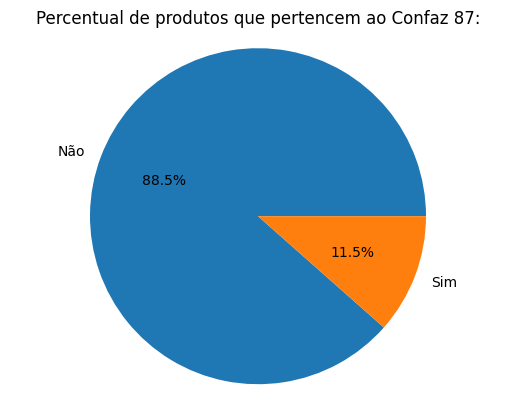

In [ ]:
#Verificando quantos produtos estão inclusos na lista do covênio Confaz 87
contagem_convenio = df['CONFAZ 87'].value_counts()

print(contagem_convenio)
mt.pie(contagem_convenio.values, labels=contagem_convenio.index, autopct='%1.1f%%')
mt.title('Percentual de produtos que pertencem ao Confaz 87:')
mt.axis('equal')  # Para garantir que o gráfico de pizza seja circular.
mt.show()


Pode-se notar que, 3.298 podutos pertencem ao convênio 87.

In [ ]:
contagem_tarja = df['TARJA'].value_counts()

print(contagem_tarja)


Tarja Vermelha                  12542
Tarja Vermelha (**)              5702
Tarja Vermelha sob restrição     4929
- (*)                            1898
Tarja Sem Tarja                  1880
Tarja Preta (**)                 1207
Tarja Preta                       452
Name: TARJA, dtype: int64


Além do mais, 25.071 possuem algum tipo de tarja vermelha, 1.659 possuem tarja preta e 1.880 não possuem qualquer tipo de tarja.

In [ ]:
#Verificando quantos produtos possuem obrigatoriedade de aplicação do coeficiênte de adequação de preços (CAP).
contagem_cap = df['CAP'].value_counts()

print(contagem_cap)

Não    25868
Sim     2742
Name: CAP, dtype: int64


Podemos verificar, através do código acima, que 2.742 produtos são do roll de produtos contemplados com o CAP, enquanto 25.868 não participam desta lista.

In [ ]:
#Verificando quantos produtos participam tanto da lista CAP quanto Convênio Confaz 87.
confaz_e_cap = df[(df['CONFAZ 87'] == 'Sim') & (df['CAP'] == 'Sim')]

confaz_e_cap = confaz_e_cap.shape[0]

print("Total de medicamentos que participam do convênio 87 e têm 'CAP' igual a 'sim':", confaz_e_cap)


Total de medicamentos que participam do convênio 87 e têm 'CAP' igual a 'sim': 2019


In [ ]:
#Verificando quantos produtos fazem parte da lista positiva de concessão de crédito tributário (PIS/CONFINS):
lista_positiva = df[(df['LISTA DE CONCESSÃO DE CRÉDITO TRIBUTÁRIO (PIS/COFINS)'] == 'Positiva')]
lista_positiva = lista_positiva.shape[0]
print(lista_positiva)

19492


 "Lista de Concessão de Crédito Tributário" refere-se aos medicamentos que têm direito a receber créditos tributários em relação a essas contribuições. Como podemos verificar acima, 19.492 produtos fazem parte desta lista.

In [ ]:
#Verificando e quantificando produtos em relação ao seu status.
tipo_produto = df['TIPO DE PRODUTO (STATUS DO PRODUTO)'].value_counts()

print(tipo_produto)

Genérico                       10407
Similar                         9675
Novo                            4186
Específico                      2295
Biológico                       1289
Fitoterápico                     390
    -                            328
Produto de Terapia Avançada       39
Radiofármaco                       1
Name: TIPO DE PRODUTO (STATUS DO PRODUTO), dtype: int64


In [ ]:
#Verificando e quantificando produtos em relação a sua classe terapêutica.
classe_terapeutica = df['CLASSE TERAPÊUTICA'].value_counts()

print(classe_terapeutica)

N3A - ANTIEPILÉPTICOS                                                      1171
N5A1 - ANTIPSICÓTICOS ATÍPICOS                                              806
N2B2 - ANALGÉSICOS NÃO NARCÓTICOS E ANTIPIRÉTICOS ISENTOS DE PRESCRIÇÃO     676
C10A1 - ESTATINAS, INIBIDORES DA REDUTASE HMG-CoA                           638
M1A1 - ANTIRREUMÁTICOS NÃO ESTEROIDAIS PUROS                                625
                                                                           ... 
S1G9 - OUTROS PRODUTOS OFTALMOLÓGICOS SIMILARES                               1
H4B - GLUCAGON                                                                1
A1A2 - ANTISSÉPTICOS E ANTIINFECCIOSOS BUCAIS                                 1
A11A3 - POLIVITAMÍNICOS COM MINERAIS, GERIÁTRICO                              1
V6D - OUTROS NUTRIENTES                                                       1
Name: CLASSE TERAPÊUTICA, Length: 536, dtype: int64


In [ ]:
regime = df['REGIME DE PREÇO'].value_counts()

print(regime)

Regulado    25131
Liberado     3479
Name: REGIME DE PREÇO, dtype: int64
